In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# 1. Load and preprocess the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [ ]:
1. Ensures Data Completeness
Missing values can disrupt machine learning models, leading to inaccurate predictions or errors during training.

Some algorithms (e.g., Logistic Regression and SVM) cannot handle missing values directly.

2. Determines Necessary Preprocessing Steps
If missing values exist, we might need to:

Remove rows/columns with excessive missing data.

Impute missing values using statistical techniques like mean, median, or mode.

3. Improves Model Performance
Clean, complete datasets help models learn better patterns, leading to higher accuracy.

In [9]:
df.duplicated().sum()

0

In [11]:
df.shape

(569, 31)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [19]:
# Splitting dataset into features and target
X = df.drop(columns=['target'])
y = df['target']


In [21]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
Feature Scaling
Purpose: Standardizes features by scaling them to have a mean of 0 and a standard deviation of 1.

Why is this important?
Algorithms like Logistic Regression, SVM, and k-NN are sensitive to feature magnitudes.

Ensures all features contribute equally to the model, improving convergence and accuracy.

Avoids bias due to large numerical differences in feature values.

In [23]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
1. Logistic Regression
How it Works:
Logistic Regression is a statistical method that models the probability that an instance belongs to a particular class. It uses a sigmoid function to map predictions between 0 and 1.

Why Suitable?
It works well for binary classification problems like this one (benign vs. malignant) and is computationally efficient.

2. Decision Tree Classifier
How it Works:
A Decision Tree recursively splits data based on feature conditions, forming a tree structure where leaves represent class labels.

Why Suitable?
It provides interpretability and works well with both numerical and categorical data, though it can overfit if not pruned.

3. Random Forest Classifier
How it Works:
Random Forest is an ensemble learning method that creates multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.

Why Suitable?
It enhances model robustness, reduces overfitting compared to individual decision trees, and handles high-dimensional data well.

4. Support Vector Machine (SVM)
How it Works:
SVM finds the optimal hyperplane that best separates different classes in the feature space. It can use kernel functions to transform data for better separation.

Why Suitable?
It performs well in high-dimensional spaces and is effective when the classes are well separated.

5. k-Nearest Neighbors (k-NN)
How it Works:
k-NN classifies a data point by looking at the 'k' nearest neighbors and assigning the most common class label among them.

Why Suitable?
It is simple and works well for small datasets, but performance can degrade with large datasets due to high computation time.

In [25]:
#  Implement classification algorithms
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "k-NN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

Logistic Regression Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]
--------------------------------------------------
Decision Tree Accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Confusion Matrix:
 [[40  3]
 [ 3 68]]
--------------------------------------------------
Random Forest Accuracy: 0.9649
              precision    recall  f1-score   support

           0  

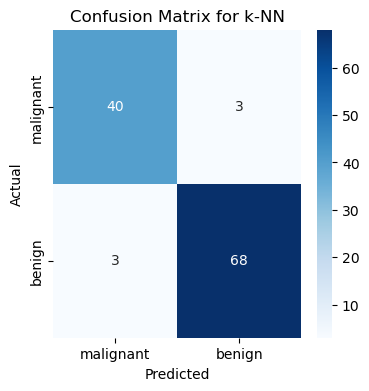

In [27]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {name}')
plt.show()  

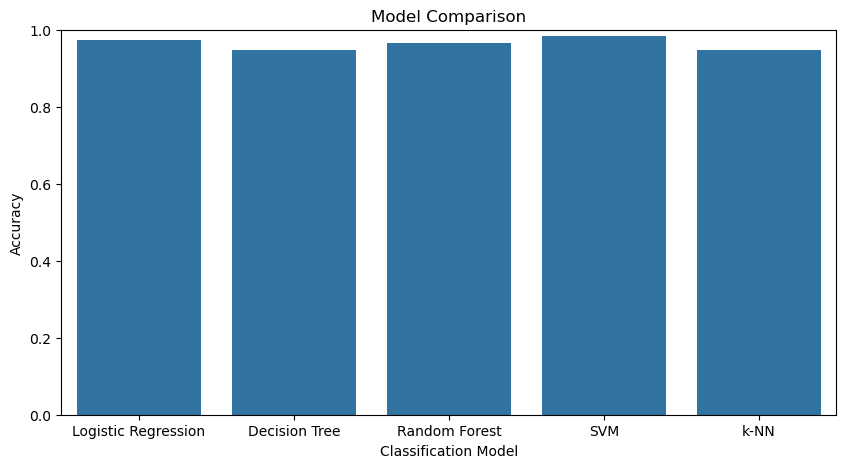

In [29]:
#  Compare model performances
plt.figure(figsize=(10, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.xlabel("Classification Model")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)
plt.show()

In [21]:
# Best and worst performing models
best_model = max(results, key=results.get)
worst_model = min(results, key=results.get)
print(f"Best performing model: {best_model} with accuracy {results[best_model]:.4f}")
print(f"Worst performing model: {worst_model} with accuracy {results[worst_model]:.4f}")

Best performing model: SVM with accuracy 0.9825
Worst performing model: Decision Tree with accuracy 0.9298
